

# Project: Investigaitng No-show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset selected for this project is No-show appointment dataset.The dataset includes several variables such as Hipertension, Diabetes, Gender, Appointmentday etc. In this project, I want to know that if factors such as gender, hipertension, and sms received would affect the rate of No-show. Here, gender, hipertension, and sms received are my independent variables and No-show would be the dependent variables. 


#import packages 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling



#upload the dataset to read and assessing the dataframe

In [2]:
df=pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#check how many rows and columns in this dataset

In [3]:
df.shape

(110527, 14)

#check data type of each variable 

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#check null value of each variable, find there are no missing values for each variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#check unique value of each variable 

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#view the summary statistics of each variable 

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#check duplicates

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

#no duplicates in this dataset

In [9]:
sum(df.duplicated())

0


### Cleaning No-show appointment dataset

To clean the dataset, I am going to drop some columns that is specific to patients but not useful to my analysis. Here, columns named 'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'will be dropped in this dataset. 



In [10]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [11]:
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


#becuase the original data set is already very clean, which has no missing values and duplicates, there are no need to fill out the mean of value and drop dupliates

<a id='eda'></a>
## Exploratory Data Analysis



### Whether gender is related to No-show of appointment? 

#first, I am going to sort out all the No-show appointment and saved to a variable named df_a, here "No_show=yes" means the patient does not come for appointment 

In [12]:
df_a= df[df['No-show']=='Yes']

In [13]:
df_b=df[df['No-show']=='No']

#use values _counts to divide no show appointment by gender and then saved as to a new variable named df_gender, below shows 14594 female and 7725 males not coming to appointment

In [14]:
df_gender=df_a['Gender'].value_counts()

In [15]:
df_gender

F    14594
M     7725
Name: Gender, dtype: int64

Text(0, 0.5, 'No-show')

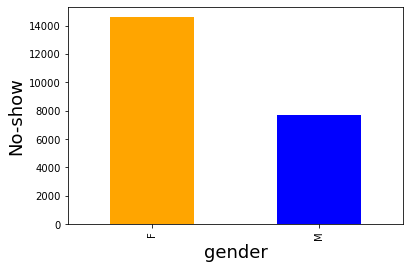

In [16]:
colors=['orange','blue']
df_gender.plot (kind='bar', label= 'No-show appointent by gender', color=colors) 
plt.xlabel('gender', fontsize=18)
plt.ylabel('No-show', fontsize=18)

#from the histgram above, we can see that female are more likely to be No-show, but it is better to make the data more accurate, it is better to use proportion to determine the rate of No-show for both gender

#below use groupby function to calculate the numbers of female and male in this dataset, random select one of the column (here selecting column 'No-show') to get the results  

In [17]:
totals=df.groupby('Gender').count()['No-show']
totals

Gender
F    71840
M    38687
Name: No-show, dtype: int64

#calculate proportions of female and male miss appointment 

#plot the proportions using bar graph 

Text(0, 0.5, 'proportions')

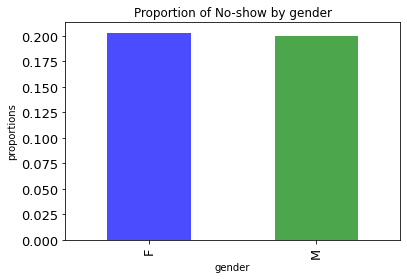

In [18]:
colors=['blue','green']
proportions=df_gender/totals
proportions.plot(kind='bar', title='Proportion of No-show by gender', color=colors, fontsize=(13), alpha=0.7)
plt.xlabel("gender")
plt.ylabel("proportions")

###from the bar graph above, we can see that gender does not affect the No-show, there are no huge differnce between these 2 bars. 

###  Whether receiving SMS message would affect the rate of No-show? 

#use groupby funtion to calculate the mean of sms_received for showed-up patient & not showed-up patient 

In [19]:
df.groupby('No-show').mean()['SMS_received']

No-show
No     0.291334
Yes    0.438371
Name: SMS_received, dtype: float64

##draw the bar graph for these two groups

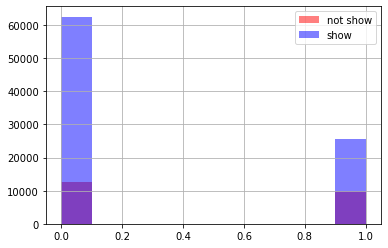

In [20]:
df_a['SMS_received'].hist(label='not show', color='red',alpha=0.5)
df_b['SMS_received'].hist(label='show',color='blue', alpha=0.5)
plt.legend()


#from the histgram above, we can see that most patients showed up are those not received message. So SMS message does affect the rate of patient showing up for the appointment. 

# Whether Hipertension and Diabetes affect the rate of No-show? 

#count patients showing up and not showing up by having symptom of Diabetes or not

In [21]:
df.groupby('Diabetes')['No-show'].value_counts()



Diabetes  No-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

#below is the pie graph for these 4 groups, 0 means no diabetes, 1 means diabetes, from the result we can see most people not coming to appoinment no diabetes, and patients who coming to appoinment also without diabetes

<AxesSubplot:ylabel='No-show'>

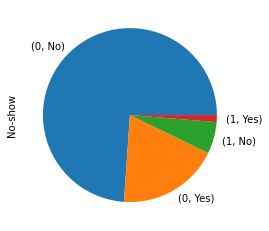

In [22]:
df.groupby('Diabetes')['No-show'].value_counts().plot(kind='pie')


#below we find the mean of hipertension for both patients suffer diabetes and not suffer diabetes. 

In [23]:
df.groupby('No-show')['Hipertension'].mean()

No-show
No     0.204392
Yes    0.169004
Name: Hipertension, dtype: float64

##below we find the mean of hipertension for both patients who showed up and not showed up 

Text(0, 0.5, 'proportion')

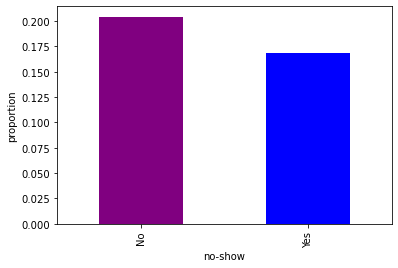

In [24]:
colors=['purple','blue']
df.groupby('No-show')['Hipertension'].mean().plot(kind='bar',color=colors)
plt.xlabel('no-show')
plt.ylabel('proportion')

#from the two bar graphs above, we can see that hipertension does affect the No-show appointment, patients having no hipertension are more likely to come to appointment. 

<a id='conclusions'></a>
## Conclusions

After the data analysis I did previously, I found that SMS message and hipertension affect the rate of show up. Patients who received sms are more likely to not show up for the appointment. people who coming to the appoinment most likely not suffer from hipertension. Other variables such as gender, diabetes, has no significant affect to no show up rate. According the analysis, there is a slight difference between the number of female and male coming to the appoinment. Diabetes also is not related to the show up rate. There are still some limitations invloved in my data analysis. For example, if my sample size increases, the result for previous anallysis may be different. May be the result would be gender does affect the no-show rate. In addition, this dataset does not include many other symptoms which may also affect the no-show rate, such as heart diseases. 


